In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import manufacturing as mn

In [2]:
# raw1 = pd.read_excel('FFP_ASSY.xlsx', sheet_name='Raw Data',usecols=['ProcessType','JobNO','Result','ItemNameType','failitem','Item47','Item89','Item57','Item46'])

In [3]:
# raw1.to_excel('tweak_ApprochS70s_FFP_ASSY.xlsx',index=False)

In [4]:
raw = pd.read_excel('EP42_PR_raw.xlsx', sheet_name='Raw data')

In [5]:
plt.style.use('fivethirtyeight')

In [6]:
raw.sample(5)

,ProcessType,JobNO,ItemNameType,StationID,SerialNumber,Result,failitem,Item31,Item42,Item212,Item285,Item293
353,Epix_Pro_FT1,16149356,17802,3,3438581914,True,0,0.810001,27.0,NaN,NaN,NaN
10161,Epix_pro_42_M_B,16149387,17196,1,3438582317,False,212,0.000000,NaN,53.336991,NaN,NaN
11942,BI_Before,16149398,10541,1,3438582098,True,0,NaN,NaN,NaN,NaN,NaN
9695,BI_Before,16149383,10541,1,3438582385,True,0,NaN,NaN,NaN,NaN,NaN
1645,Epix_Pro_GSensor,16149356,17808,3,3438581937,True,0,0.000000,NaN,NaN,NaN,NaN


# def

In [7]:
def tweak_df(df,itemnametype, item, lower):    
    return(df
    # .assign(Vendor = (raw.JobNO.where(~raw.JobNO.isin(chitwig),'chitwig').where(~raw.JobNO.isin(sharpeye),'sharpeye')))
    .query(f"ItemNameType=={itemnametype} and failitem.isin([0,{item}]) and Item{item}>{lower}")
    [['ProcessType','Result',f'Item{item}','JobNO']]
    .astype({'JobNO':'category'})
    .sort_values('JobNO', ascending=False)
    )

In [8]:
def my_hisplot(df,itemnametype, item, lower, title):
    
    plt.figure(dpi=100)
    plt.title(title)
    
    return(sns.histplot(data = (df
    # .assign(Vendor = (raw.JobNO.where(~raw.JobNO.isin(chitwig),'chitwig').where(~raw.JobNO.isin(sharpeye),'sharpeye')))
    .query(f"ItemNameType=={itemnametype} and failitem.isin([0,{item}]) and Item{item}>{lower}")
    [['ProcessType','Result',f'Item{item}']])
    ,x=f'Item{item}'
    ,hue='Result'
    ,hue_order=[1,0]
    )
    )

In [9]:
def my_stripplot(df,itemnametype, item, lower, title):
    
    plt.figure(dpi=100)
    plt.title(title)
    
    return(sns.stripplot(data = (df
    # .assign(Vendor = (raw.JobNO.where(~raw.JobNO.isin(chitwig),'chitwig').where(~raw.JobNO.isin(sharpeye),'sharpeye')))
    .query(f"ItemNameType=={itemnametype} and failitem.isin([0,{item}]) and Item{item}>{lower}")
    [['ProcessType','Result',f'Item{item}','Vendor']])
    ,x='Vendor'
    ,y=f'Item{item}'
    ,hue='Result'
    ,hue_order=[1,0]
    ,dodge=True
    )
    )

In [10]:
def ppk_df(df,itemnametype, item):    
    return(df
    .query(f"ItemNameType=={itemnametype} and Result==True")
    [f'Item{item}']
    )

In [11]:
def ppk(df, upper, lower):
    return (
        mn.calc_pp(df, upper_specification_limit=upper, lower_specification_limit=lower),
        mn.calc_ppk(df, upper_specification_limit=upper, lower_specification_limit=lower),
        mn.suggest_specification_limits(df)
        )

<AxesSubplot: title={'center': 'M_B (4000Hz) dBSPL+A 16.44%'}, xlabel='Item212', ylabel='Count'>

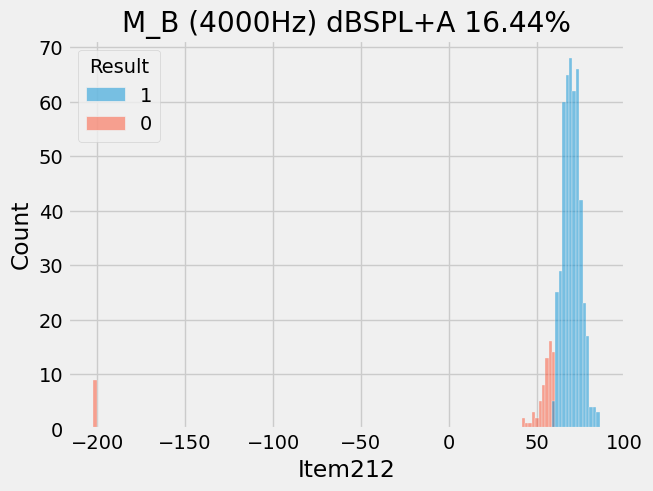

In [13]:
my_hisplot(raw, 17196, 212, -999, 'M_B (4000Hz) dBSPL+A 16.44%')

# ECG

<AxesSubplot: title={'center': 'ECG_FT ECG RLD 10Hz 500mV Test 16.01%'}, xlabel='Item293', ylabel='Count'>

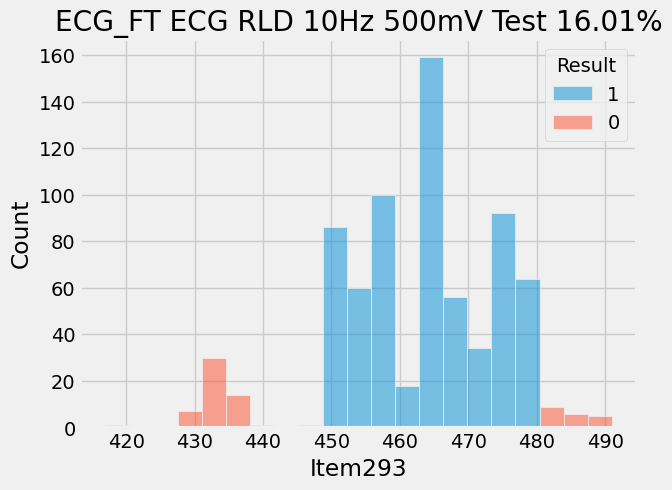

In [14]:
my_hisplot(raw, 17820, 293, -9999, 'ECG_FT ECG RLD 10Hz 500mV Test 16.01%')

Fixture improvement and loosn spec. Spring do not contact or coating issue 

<AxesSubplot: title={'center': 'ECG_FT ECG impedance short 15.35%'}, xlabel='Item285', ylabel='Count'>

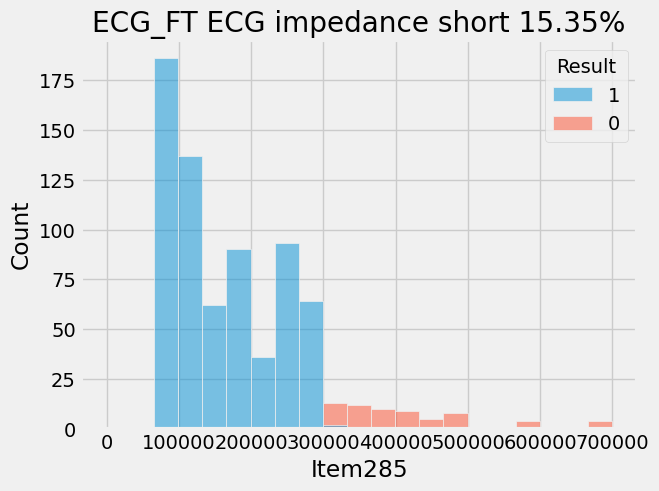

In [15]:
my_hisplot(raw, 17820, 285, -9999, 'ECG_FT ECG impedance short 15.35%')

Fixture improvement and loosn spec

# HT L5

<AxesSubplot: title={'center': 'HT GPS_L5 by ref 8.24%'}, xlabel='Item42', ylabel='Count'>

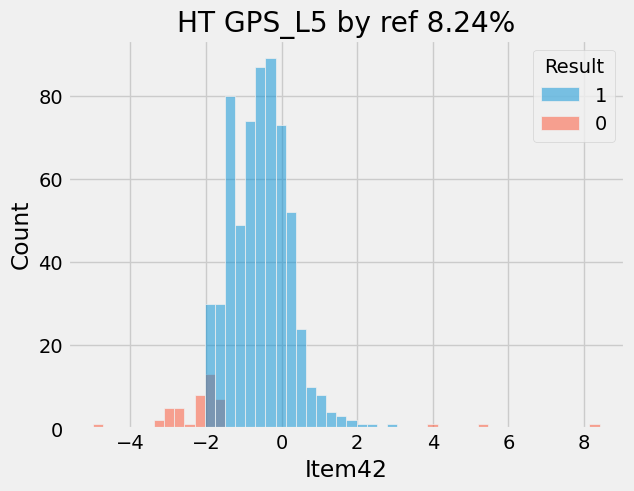

In [16]:
my_hisplot(raw, 17801, 42, -20, 'HT GPS_L5 by ref 8.24%')

1. 未針對EP42的規格調整
2. Select new golden
3. HT測L5為主，L1跟L5 performance有差

<AxesSubplot: title={'center': 'FT1 GPS_ (L1 + L5) by ref 2.9%'}, xlabel='Item31', ylabel='Count'>

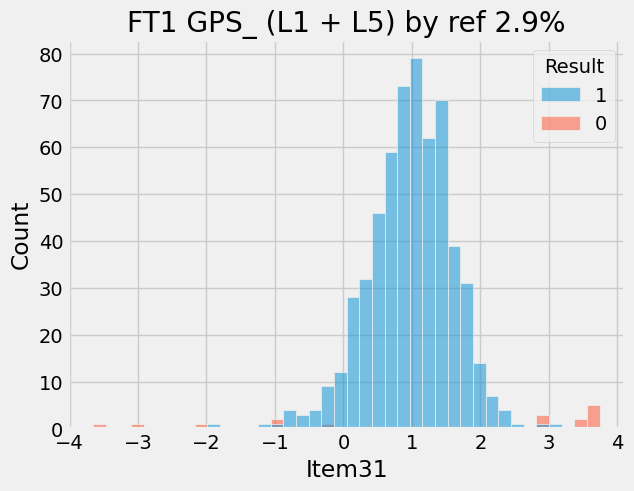

In [17]:
my_hisplot(raw, 17802, 31, -20, 'FT1 GPS_ (L1 + L5) by ref 2.9%')

Select new golden